__H0: матожидание цены Сургутнефтегаза за последний год равняется цене после дивидендного гэпа в 2022 году.__

H1: матожидание цены Сургутнефтегаза за последний год не равняется цене после дивидендного гэпа в 2022 году.

Если мы рассчитаем, что МО цены на протяжении года остается равным цене после дивгэпа, то в качестве инвестиции СНГС - плохая акция (если это не дивстратегия). В таком случае, мы можем предсказать, что после выплаты дивидендов в этом году гэп откроется и, фактически, еще год будет с МО в виде цены после отсечки.

Цена после реестра 19 июля 2022 составляет 28,69руб.

In [31]:
df_info['SNGS'] = df_info['SNGS'].fillna(method='ffill')
sngs_ltm = df_info['SNGS']
sngs_ltm = sngs_ltm[(sngs_ltm.index >= '2022-07-19') & (sngs_ltm.index <= '2023-05-17')]

In [32]:
sngs_ltm.mean()

23.072298578199035

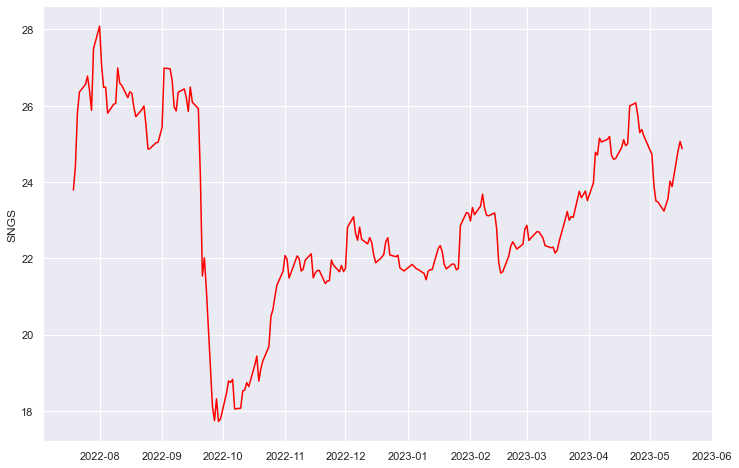

In [33]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
dates = [datetime.datetime.strptime(d, "%Y-%m-%d").date() for d in sngs_ltm.index]
sns.lineplot(x = dates, y=sngs_ltm, color = 'red');

In [157]:
from scipy.stats import ttest_1samp


data = list(sngs_ltm)

# Проверяем гипотезу о том, что матожидание равно 28
t_stat, p_value = ttest_1samp(data, 28)

# Выводим результаты
print("t-статистика:", t_stat)
print("p-значение:", p_value)


t-статистика: -31.356515301549763
p-значение: 3.6212622741031633e-81


In [158]:
p_value*100 < 1

True

P-value значительно меньше и 10, 5 или 1%, так что __гипотеза отвергается на этих уровнях значимости__.

На самом деле, наша т-статистика дает отрицательный результат, потому что __среднее значение даже меньше__, то есть за год дивидендный гэп едва закрылся. Это произошло при том условии, что мы взяли дни до новости о том, что у Сургута будут новые дивиденды гораздо ниже, чем ожидал рынок. Значит, люди берут Сургут исключительно ради дивидендов, но при этом как только они выплачиваются, цена возвращается к флэту, и долгосрочного роста на протяжении многих лет уже не существует.

Может быть, влияние имело падение в конце сентября, связанное с геополитикой? Проверим еще раз, для 2019-2020года.

__H0: матожидание цены Сургутнефтегаза за последний год равняется цене после дивидендного гэпа в 2019 году.__

H1: матожидание цены Сургутнефтегаза за последний год не равняется цене после дивидендного гэпа в 2019 году.

Если мы рассчитаем, что МО цены на протяжении года остается равным цене после дивгэпа, то в качестве инвестиции СНГС - плохая акция (если это не дивстратегия). В таком случае, мы можем предсказать, что после выплаты дивидендов в этом году гэп откроется и, фактически, еще год будет с МО в виде цены после отсечки.

Цена после реестра 17 июля 2019 составляет 26.42руб. Удивительно, почти столько же, сколько выборочная средняя после последнего дивгэпа ;_)

In [34]:
df_info['SNGS'] = df_info['SNGS'].fillna(method='ffill')
m0 = df_info.loc['2019-07-17']['SNGS']

In [35]:
df_info['SNGS'] = df_info['SNGS'].fillna(method='ffill')
sngs_ltm = df_info['SNGS']
sngs_ltm = sngs_ltm[(sngs_ltm.index >= '2019-07-17') & (sngs_ltm.index <= '2020-05-17')]
sngs_ltm.mean()

38.64399521531102

Кажется, у нас был взлет)) Эх, упущенные вохможности..

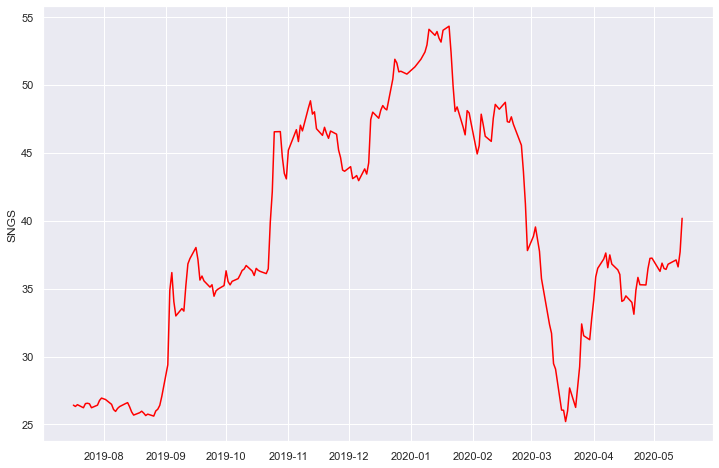

In [36]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
dates = [datetime.datetime.strptime(d, "%Y-%m-%d").date() for d in sngs_ltm.index]
sns.lineplot(x = dates, y=sngs_ltm, color = 'red');

Если бы мы закончили исследование до начала пандемии, то т-статистика была супер-большой и положительной, потому что Сургут показывает на этом фрейме очень высокие результаты. Однако на российском рынке всегда происходит шторм (литралли каждый год, поэтому ни для 2021, ни для 2022 такой эксперимент провалится из-за macro). __Именно по причине постоянного шторма нам кажется, что искать тот единственный год 20 лет назад, когда был просто и быстро закрыт гэп - не имеет смысла.__

In [37]:
from scipy.stats import ttest_1samp


data = list(sngs_ltm)

# Проверяем гипотезу о том, что матожидание равно 28
t_stat, p_value = ttest_1samp(data, m0)

# Выводим результаты
print("t-статистика:", t_stat)
print("p-значение:", p_value)

t-статистика: 20.87611863439602
p-значение: 6.219500404166415e-53


In [38]:
p_value*100 < 1

True

__Гипотеза отвергается__, но в этот раз потому что МО оказалось выше, да и в целом уровень цены сильно поднялся, несмотря на ковид. Попробуем сравнить цену после дивгэпа в 2020 году с ценой после дивгэпа в 2019, тема самым очистив динамику до роста чистой оценки компании, а не ожиданий по выплатам

In [39]:
df_info.loc['2020-07-24']['SNGS'] > df_info.loc['2020-07-17']['SNGS']

True

Действительно, получается, что __Сургут вырос, так еще и выплатил свободный поток дивидендами акционерам__. В отличие от многих акция на рынке, __Сургут может быть чисто дивидендной стратегией__.

Из этого можно сделать вывод, что как инвестиционная/спекулятивная идея Сургут не очень подходит. Но может быть стоит покупать ее после выплаты дивидендов, потом до рееастра продавать? Проверим долю доходных дней для такой идеи.

__Н0: px = py, где px - доля дней, когда доходность Сургута > 0, py - доля дней, когда доходность Сбера > 0__ 

H1: px != py

__Если доля дней одинакова, то нам при прочих равных одинаково выгодно вложиться в прокси российского рынка - в Сбер, и в Сургут, поэтому Сургут является хорошей инвест идеей__. Конечно, также имеет значение показатель бета - он определит, насколько колебания цены акции (пусть и в том же направлении), больше или меньше, чем всего рынка. Но если исходить просто из дней доходности, принимая как факт (например, уже посчитано на некоторых инвест сайтах) бету меньше 1 (колебания меньше рынка), есть смысл судить по доходным дням.

In [40]:
sber_r = np.array(df_r['SBER'])
sngs_r = np.array(df_r['SNGS'])
sber_r_b = np.where(sber_r>0, 1, 0)
sngs_r_b = np.where(sngs_r>0, 1, 0)

In [41]:
from scipy import stats as st
import numpy as np
import math as mth
 
alpha = .05 # критический уровень статистической значимости

n = len(sber_r_b)
m = len(sngs_r_b)
 
# пропорция успехов в первой группе:
p1 = sber_r_b.mean()
 
# пропорция успехов во второй группе:
p2 = sngs_r_b.mean()
 
# разница пропорций в датасетах
difference = p1 - p2

z_value = difference / mth.sqrt(p1*(1-p1)/n + p2*(1-p2)/m)
 
# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 
 
p_value = min((1 - distr.cdf(abs(z_value))),distr.cdf(abs(z_value)))  * 2
 
print('p-значение: ', p_value)
 
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

p-значение:  0.00022622734181387827
Отвергаем нулевую гипотезу: между долями есть значимая разница


In [42]:
p1

0.5321782178217822

In [43]:
p2

0.47425742574257423

__Гипотеза о равенстве долей отверглась__. На самом деле, мы видим, что у Сбера доходных дней 0,53, а у Сургута - 0,47. В рамках гипотезы с альфа = 5% доли не равны, но если судить с точки зрения инвестора, то разница небольшая - ___обе акции доходны примерно в половине дней на любом фрейме___. 

Стоит сделать ремарку, что все-таки бета Сургута намного меньше беты Сбера, поэтому, с точки зрения статистики и корпоративных финансов, глобального роста, как в Сбере, не происходит. И, соответственно, непонятно, можно ли рассчитывать на данные нашим МО прогнозы, потому что для штормящего рынка РФ, в котором дивгэп за год может едва успеть закрыться, а потом снова появиться еще на год, они выглядят вполне оптимистично.

# Вывод

Мы проверили несколько гипотез: матожидание цены Сургутнефтегаза за последний год равняется цене после дивидендного гэпа и доля доходных дней для Сбера и Сургута одинаковы.

Исходя из проведенного анализа финансового рынка, мы можем сказать, что __Сургутнефтегаз - определенно не инвестиционно-спекулятивная стратегия__. И это подтверждают гипотезы: ___годовой рост съедается выплачиваемыми дивидендами, и реальный рост цены акции склонен появляться лишь в моменты, когда на рынке царит эйфория___. При этом даже не во все дни эйфории котировки показывают плюс: гипотеза о равенстве долей доходных дней для Сургута и Сбера оказалась отвергнута. 

Если говорить о том, склонны ли мы советовать данную стратегию, прогноз по МО говорит, что в этом есть смысл. В какой-то степени акция может стать защитной гаванью, если будут выплачиваться дивиденды, потому что матожидание за год не меньше чем цена после дивгэпа, а другие акции уходят в глубокий убыток. К тому же, если доля доходных дней близка к половине, общий вью по акции не негативный. 